In [1]:
import os
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

c:\ProgramData\Anaconda3\envs\allen_loader\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pickle

In [3]:

data_dir = './data'
manifest_path = os.path.join(data_dir, 'manifest.json')

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [4]:
#downloads data - takes 5min
sessions = cache.get_session_table()

In [5]:
len(sessions)

58

In [6]:
sessions.columns

Index(['published_at', 'specimen_id', 'session_type', 'age_in_days', 'sex',
       'full_genotype', 'unit_count', 'channel_count', 'probe_count',
       'ecephys_structure_acronyms'],
      dtype='object')

In [7]:
i = 4

session = cache.get_session_data(sessions.index.values[i],
                                 isi_violations_maximum = np.inf,
                                 amplitude_cutoff_maximum = np.inf,
                                 presence_ratio_minimum = -np.inf,
                                 timeout = None)

In [8]:
session?

Type:           EcephysSession
String form:    <allensdk.brain_observatory.ecephys.ecephys_session.EcephysSession object at 0x00000271CE97F7F0>
File:           c:\programdata\anaconda3\envs\allen_loader\lib\site-packages\allensdk\brain_observatory\ecephys\ecephys_session.py
Docstring:     
Represents data from a single EcephysSession

Attributes
----------
units : pd.Dataframe
    A table whose rows are sorted units (putative neurons) and whose
    columns are characteristics of those units.
    Index is:
        unit_id : int
            Unique integer identifier for this unit.
    Columns are:
        firing_rate : float
            This unit's firing rate (spikes / s) calculated over the
            window of that unit's activity (the time from its first
            detected spike to its last).
        isi_violations : float
            Estamate of this unit's contamination rate (larger means
            that more of the spikes assigned to this unit probably
            originated f

In [9]:
# session.metadata #takes too long to run everytime

In [10]:
units = session.units

In [11]:
print('Total number of units:' + str(len(units)))
units.head()

Total number of units:1453


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951872924,0.815136,78.245895,0.359461,0,613.14,NaN,7.324416,0.370530,NaN,NaN,...,8.0,grey,NaN,NaN,NaN,probeA,See electrode locations,29999.970319,1249.998763,True
951872955,0.685927,81.151200,0.116644,2,599.86,6.189100,1.815070,4.256853,76.365325,0.003080,...,8.0,grey,NaN,NaN,NaN,probeA,See electrode locations,29999.970319,1249.998763,True
951872972,0.491988,94.317600,0.500000,3,559.90,3.297011,1.139876,9.553076,47.860113,0.053102,...,8.0,grey,NaN,NaN,NaN,probeA,See electrode locations,29999.970319,1249.998763,True
951872999,0.507304,110.062680,0.157912,5,200.34,4.020396,1.462059,11.492885,62.799721,0.012955,...,8.0,grey,NaN,NaN,NaN,probeA,See electrode locations,29999.970319,1249.998763,True
951873012,0.590212,91.337610,0.500000,6,251.63,2.315217,3.567084,0.993823,87.069361,0.031431,...,8.0,grey,NaN,NaN,NaN,probeA,See electrode locations,29999.970319,1249.998763,True


In [12]:
#filtering units
V1_units = units[(units.ecephys_structure_acronym == 'VISp') &
                 (units.isi_violations < 0.1)]

print('Total number of low contamination units:' + str(len(V1_units)))

Total number of low contamination units:49


In [13]:
V1_units.index.values

array([951867921, 951867908, 951867993, 951867963, 951867935, 951868041,
       951870245, 951868026, 951867948, 951870654, 951870258, 951868164,
       951868229, 951868213, 951868296, 951868375, 951868362, 951868331,
       951868444, 951868431, 951868418, 951868404, 951868527, 951868515,
       951868473, 951868585, 951868633, 951868616, 951870296, 951868820,
       951868676, 951868744, 951868864, 951868924, 951869028, 951869012,
       951870308, 951869143, 951870323, 951869357, 951870335, 951870350,
       951869514, 951869470, 951869622, 951869529, 951869485, 951870543,
       951870405], dtype=int64)

In [14]:
session.stimulus_names

['spontaneous',
 'gabors',
 'flashes',
 'invalid_presentation',
 'drifting_gratings',
 'natural_movie_three',
 'natural_movie_one',
 'static_gratings',
 'natural_scenes']

In [15]:
stim_cats = ['drifting_gratings', 'gabors', 'flashes', 'spontaneous']

In [16]:
stim_table = session.get_stimulus_table(stim_cats)
stim_table

,color,contrast,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,
0,null,null,null,null,null,null,28.998830,null,spontaneous,89.065570,null,null,null,60.066740,0.0
1,null,0.8,90.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,89.065570,0.0,gabors,89.299092,4.0,-20.0,30.0,0.233522,1.0
2,null,0.8,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,89.299092,0.0,gabors,89.549295,4.0,30.0,-40.0,0.250203,2.0
3,null,0.8,0.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,89.549295,0.0,gabors,89.799498,4.0,-20.0,30.0,0.250203,3.0
4,null,0.8,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,89.799498,0.0,gabors,90.049700,4.0,-10.0,-10.0,0.250203,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51354,null,null,null,null,null,null,5883.921970,null,spontaneous,5913.947050,null,null,null,30.025080,0.0
55196,null,null,null,null,null,null,7175.000330,null,spontaneous,7205.025420,null,null,null,30.025090,0.0
57117,null,null,null,null,null,null,7685.426650,null,spontaneous,7715.451730,null,null,null,30.025080,0.0


In [17]:
def get_bins(stim_time, bin_w = 10, start_adj = 500, end_adj = 2000):
    
    stim_time_ms = int(stim_time * 1000)
    start_ms = stim_time_ms - 500
    end_ms = stim_time_ms + 2000
    
    return np.arange(start_ms, end_ms, bin_w)

In [ ]:
firing_rates_all_stim = []
#likely inefficient
for stim in tqdm.tqdm(stim_table.start_time.to_numpy()):
    bins = get_bins(stim) #timepoints of data

    #array for storing spike data around one stimulus (units x bins)
    firing_rates = np.zeros((len(V1_units.index.values), bins.shape[0]+2))

# # #loading spike times
    for i, unit in enumerate(V1_units.index.values):
        all_spikes = session.spike_times[unit]
        stim_spikes = all_spikes[(all_spikes >= stim - 0.5)&(all_spikes < stim + 2)]*1000
        rate = np.digitize(stim_spikes, bins)
        spikebin, count = np.unique(rate, return_counts = True)
        firing_rates[i][spikebin] = count
    firing_rates_all_stim.append(firing_rates)
    
firing_rates_all_stim = np.array(firing_rates_all_stim)
#maybe sort the data by firing rate or something? otherwise it's probably hard to compare between animals

  0%|          | 0/4435 [00:00<?, ?it/s]

100%|██████████| 4435/4435 [01:01<00:00, 72.17it/s] 


In [19]:
stim_rename = {cat : i for i, cat in enumerate(stim_cats)}
stim_rename

{'drifting_gratings': 0, 'gabors': 1, 'flashes': 2, 'spontaneous': 3}

In [20]:
y_np = stim_table['stimulus_name'].replace(stim_rename).to_numpy()


In [21]:
y_np.shape

(4435,)

In [22]:
firing_rates_all_stim.shape

(4435, 49, 252)

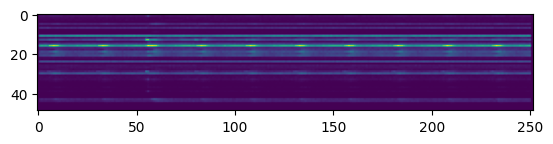

In [23]:
plt.imshow(np.mean(firing_rates_all_stim, axis = 0))

(array([32.,  8.,  2.,  5.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([9.92108230e-04, 2.25478241e+00, 4.50857272e+00, 6.76236302e+00,
        9.01615333e+00, 1.12699436e+01, 1.35237339e+01, 1.57775242e+01,
        1.80313145e+01, 2.02851048e+01, 2.25388952e+01]),
 <BarContainer object of 10 artists>)

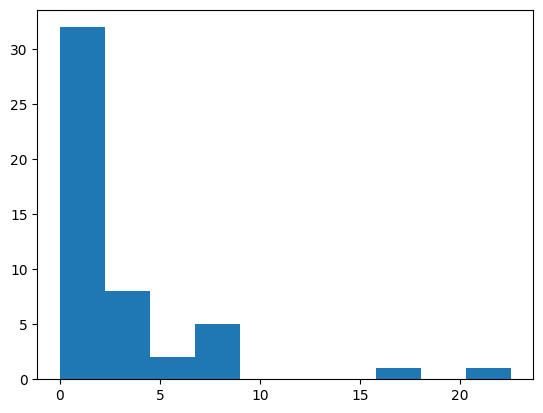

In [24]:
plt.hist(np.mean(np.sum(firing_rates_all_stim, axis = 2), axis = 0)/2.5)

In [26]:
firing_rates_all_stim.shape


(4435, 49, 252)

In [30]:
import pickle
#dump x
fname = 0
with open(f'{fname}_x.pkl', 'wb') as f:
    pickle.dump(firing_rates_all_stim, file = f)
#dump y
with open(f'{fname}_y.pkl', 'wb') as f:
    pickle.dump(y_np, file = f)